## Imports

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Carregando dados

In [3]:
# Carregando os dados das partidas dos jogadores

df_clusters = pd.read_csv('Dados/clusters.csv')
df_clusters.head(10)

,stt_jgd_id,stt_chutes_ao_gol,stt_gols,stt_defesas,stt_assistencias,stt_pontuacao,stt_relacao_chute_gol,stt_impulso_por_minuto,stt_med_impulso,stt_impulso_coletado,...,stt_velocidade_med,stt_distancia_percorrida,stt_distancia_med_da_bola,stt_distancia_med_posse,stt_distancia_med_s_posse,stt_distancia_med_dos_aliados,stt_demolicoes_causadas,stt_demolicoes_recebidas,stt_participacoes_gols,cluster
0,1,2.67,0.00,2.00,0.33,297.33,0.00,310.67,44.53,1790.33,...,1438.33,460250.33,3080.00,3194.67,2975.67,3703.33,0.33,3.33,33.33,2
1,2,1.39,0.18,0.75,0.61,208.50,11.61,334.96,46.81,2032.82,...,1446.93,493567.71,3071.86,3113.29,3035.04,3649.04,0.61,1.11,30.06,2
2,3,2.15,0.59,1.11,0.52,303.85,16.42,398.15,50.88,2337.93,...,1526.04,510809.33,2906.67,2852.22,2951.74,3530.44,0.70,0.81,37.25,1
3,4,2.41,0.59,1.63,0.37,339.33,16.34,381.15,45.16,2296.81,...,1544.78,524575.15,2872.56,2747.67,2969.81,3657.89,0.48,0.63,43.21,1
4,5,2.80,0.80,1.47,0.66,380.09,21.96,411.97,54.04,2478.81,...,1516.00,515443.72,2846.74,2754.35,2939.38,3702.99,0.99,0.77,44.79,0
5,6,2.76,0.85,1.52,0.54,368.30,13.76,362.00,56.52,2164.43,...,1510.72,506783.33,2943.41,2845.41,3048.65,3626.89,0.37,1.02,49.08,1
6,7,2.43,0.62,1.20,0.58,333.74,16.00,422.72,46.77,2500.60,...,1503.62,512284.41,2864.44,2731.03,2987.92,3709.59,0.91,0.93,39.48,0
7,8,2.69,0.86,1.14,0.67,363.21,23.10,357.52,45.46,2092.86,...,1480.71,499300.36,2882.14,2820.24,2951.43,3637.33,0.69,0.98,36.94,1
8,9,2.23,0.59,1.54,0.56,351.29,17.94,394.42,45.55,2368.66,...,1509.98,526107.76,3001.37,2898.12,3096.08,3761.22,0.72,0.90,40.06,1
9,10,3.34,1.14,1.22,0.70,412.74,25.51,413.06,49.57,2396.92,...,1581.16,531653.40,3022.62,2878.14,3164.70,3690.48,1.66,0.70,57.47,0


In [4]:
# Carregando os dados de nome e apelido dos jogadores e removendo colunas desnecessárias

df_jogadores = pd.read_csv('Dados/jogadoresV28.csv', sep=';')
df_jogadores.drop('jgd_pis_id', axis=1, inplace=True)
df_jogadores.drop('jgd_old_id', axis=1, inplace=True)
df_jogadores.head(10)

,jgd_id,jgd_tag,jgd_nome
0,1,*YASUDON*,NaN
1,2,47_VT,NaN
2,3,AbechanTV,NaN
3,4,AkezoraRara,NaN
4,5,akikansu,NaN
5,6,Akira0902,NaN
6,7,AKKINN,NaN
7,8,Alpha,NaN
8,9,amatel,NaN
9,10,Amore,NaN


In [5]:
# Unindo os DF's

df = pd.merge(df_jogadores, df_clusters,  left_on='jgd_id', right_on='stt_jgd_id')
df.drop('stt_jgd_id', axis=1, inplace=True)
df.head(10)

,jgd_id,jgd_tag,jgd_nome,stt_chutes_ao_gol,stt_gols,stt_defesas,stt_assistencias,stt_pontuacao,stt_relacao_chute_gol,stt_impulso_por_minuto,...,stt_velocidade_med,stt_distancia_percorrida,stt_distancia_med_da_bola,stt_distancia_med_posse,stt_distancia_med_s_posse,stt_distancia_med_dos_aliados,stt_demolicoes_causadas,stt_demolicoes_recebidas,stt_participacoes_gols,cluster
0,1,*YASUDON*,NaN,2.67,0.00,2.00,0.33,297.33,0.00,310.67,...,1438.33,460250.33,3080.00,3194.67,2975.67,3703.33,0.33,3.33,33.33,2
1,2,47_VT,NaN,1.39,0.18,0.75,0.61,208.50,11.61,334.96,...,1446.93,493567.71,3071.86,3113.29,3035.04,3649.04,0.61,1.11,30.06,2
2,3,AbechanTV,NaN,2.15,0.59,1.11,0.52,303.85,16.42,398.15,...,1526.04,510809.33,2906.67,2852.22,2951.74,3530.44,0.70,0.81,37.25,1
3,4,AkezoraRara,NaN,2.41,0.59,1.63,0.37,339.33,16.34,381.15,...,1544.78,524575.15,2872.56,2747.67,2969.81,3657.89,0.48,0.63,43.21,1
4,5,akikansu,NaN,2.80,0.80,1.47,0.66,380.09,21.96,411.97,...,1516.00,515443.72,2846.74,2754.35,2939.38,3702.99,0.99,0.77,44.79,0
5,6,Akira0902,NaN,2.76,0.85,1.52,0.54,368.30,13.76,362.00,...,1510.72,506783.33,2943.41,2845.41,3048.65,3626.89,0.37,1.02,49.08,1
6,7,AKKINN,NaN,2.43,0.62,1.20,0.58,333.74,16.00,422.72,...,1503.62,512284.41,2864.44,2731.03,2987.92,3709.59,0.91,0.93,39.48,0
7,8,Alpha,NaN,2.69,0.86,1.14,0.67,363.21,23.10,357.52,...,1480.71,499300.36,2882.14,2820.24,2951.43,3637.33,0.69,0.98,36.94,1
8,9,amatel,NaN,2.23,0.59,1.54,0.56,351.29,17.94,394.42,...,1509.98,526107.76,3001.37,2898.12,3096.08,3761.22,0.72,0.90,40.06,1
9,10,Amore,NaN,3.34,1.14,1.22,0.70,412.74,25.51,413.06,...,1581.16,531653.40,3022.62,2878.14,3164.70,3690.48,1.66,0.70,57.47,0


## Análise

### Verificando o cluster dos top 20 jogadores

In [6]:
# select jgd_tag, cluster where jgd_tag = 'Daniel'

top_20_jogadores = ['Vatira', 'Firstkiller', 'rise.', 'M0nkey M00n', 'Atomic', 'BeastMode', 'Seikoo', 'yanxnz', 'Joyo', 'Daniel', 'JKnaps', 'Extra', 'Chicago', 'ApparentlyJack', 'trk511', 'itachi', 'Sypical', 'noly', 'Comm', 'AztraL']

resultado = pd.DataFrame()

for jogador in top_20_jogadores:
    resultado = pd.concat([resultado, df.loc[df['jgd_tag'] == jogador, ['jgd_tag', 'jgd_nome', 'cluster']]]) 
    
resultado

,jgd_tag,jgd_nome,cluster
998,Vatira,Axel Touret,0
1130,Firstkiller,Jason Corral,0
938,rise.,Finlay Ferguson,0
876,M0nkey M00n,Evan Rogez,1
1109,Atomic,Massimo Franceschi,0
1114,BeastMode,Landon Konerman,0
950,Seikoo,Enzo Grondein,0
1012,yanxnz,Yan Nolasco,0
841,Joyo,Joe Young,0
1122,Daniel,Daniel Piecenski,0


### Total de jogadores

In [7]:
total_jogadores = np.unique(df['jgd_id']).size
print("Total de jogadores:", total_jogadores)

Total de jogadores: 1218


### Total de jogadores por cluster

cluster
1    596
0    437
2    185
Name: count, dtype: int64


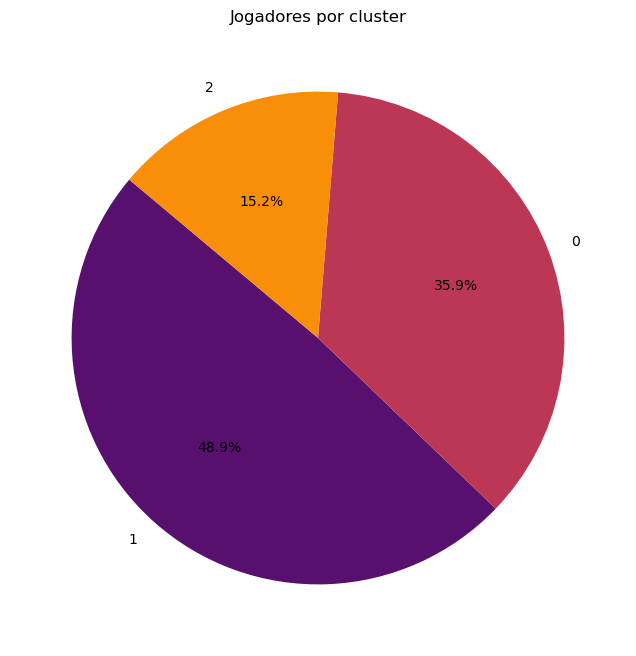

In [8]:
total_de_jogares_por_cluster = df['cluster'].value_counts()
print(total_de_jogares_por_cluster)

plt.figure(figsize=(10,8))
plt.pie(total_de_jogares_por_cluster,
        labels=total_de_jogares_por_cluster.index,
        autopct='%1.1f%%',
        startangle=140,
        colors=sns.color_palette('inferno', n_colors=3))
        
plt.title('Jogadores por cluster')
plt.show()

### Média de gols

In [9]:
media_gols = np.mean(df['stt_gols'])
media_gols = round(media_gols, 2)
print("Média de gols:", media_gols)

Média de gols: 0.63


### Média de gols por cluster

cluster
0    0.71
1    0.64
2    0.42
Name: stt_gols, dtype: float64


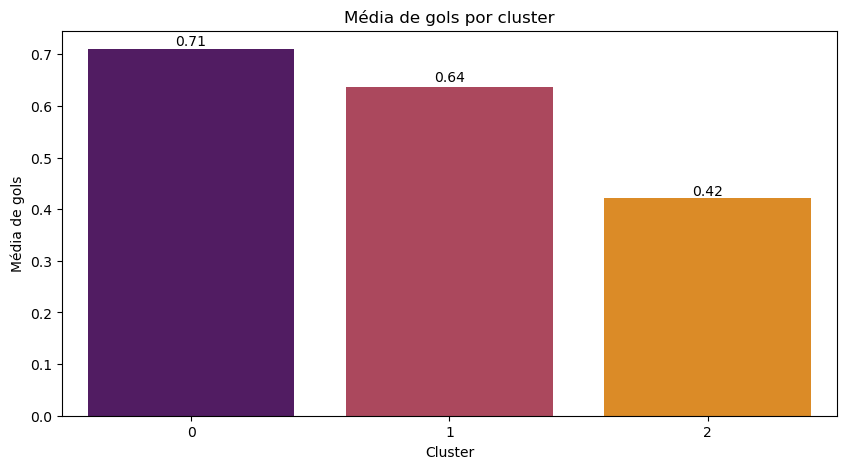

In [17]:
media_gols_por_cluster = df.groupby('cluster')['stt_gols'].mean()
media_gols_por_cluster = round(media_gols_por_cluster, 2)
print(media_gols_por_cluster)


plt.figure(figsize=(10,5))
sns.barplot(data=df,
            x='cluster',
            y='stt_gols',
            errorbar=None,
            palette='inferno')

offset = max(media_gols_por_cluster) * 0.01

for index, value in enumerate(media_gols_por_cluster):
    plt.text(index, value + offset, str(round(value, 2)), ha='center')

plt.xlabel('Cluster')
plt.ylabel('Média de gols')
plt.title('Média de gols por cluster')
plt.show()

### Média de assistências

In [11]:
media_assistencias = np.mean(df['stt_assistencias'])
media_assist = round(media_assistencias, 2)
print("Média de assistências:", media_assist)

Média de assistências: 0.48


### Média de assistências por cluster

cluster
0    0.52
1    0.49
2    0.32
Name: stt_assistencias, dtype: float64


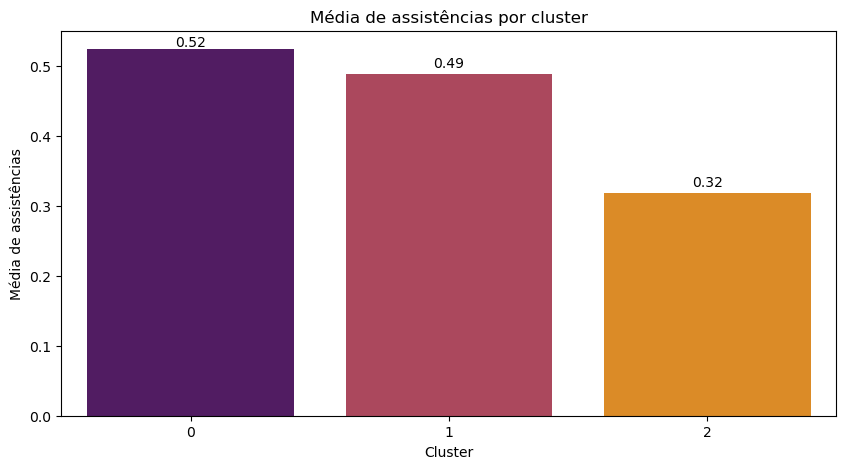

In [16]:
media_assistencias_por_cluster = df.groupby('cluster')['stt_assistencias'].mean()
media_assistencias_por_cluster = round(media_assistencias_por_cluster, 2)
print(media_assistencias_por_cluster)

plt.figure(figsize=(10,5))
sns.barplot(data=df,
            y='stt_assistencias',
            x='cluster',
            errorbar=None,
            palette='inferno')

offset = max(media_assistencias_por_cluster) * 0.015

for index, value in enumerate(media_assistencias_por_cluster):
    plt.text(index, value + offset, str(round(value, 2)), ha='center')

plt.xlabel('Cluster')
plt.ylabel('Média de assistências')
plt.title('Média de assistências por cluster')
plt.show()

### Média de defesas

In [13]:
media_defesas = np.mean(df['stt_defesas'])
media_defesas = round(media_defesas, 2)
print("Média de defesas:", media_defesas)

Média de defesas: 1.48


### Média de defesas por cluster

cluster
0    1.54
1    1.46
2    1.40
Name: stt_defesas, dtype: float64


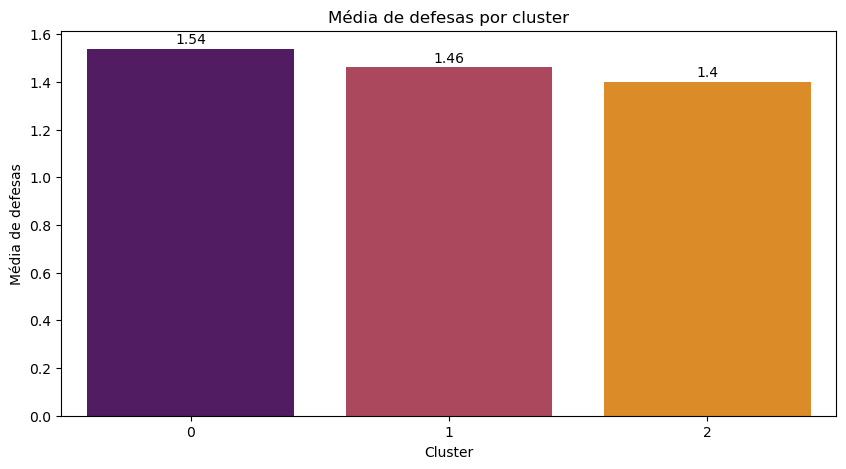

In [15]:
media_defesas_por_cluster = df.groupby('cluster')['stt_defesas'].mean()
media_defesas_por_cluster = round(media_defesas_por_cluster, 2)
print(media_defesas_por_cluster)

plt.figure(figsize=(10,5))
sns.barplot(data=df,
            y='stt_defesas',
            x='cluster',
            errorbar=None,
            palette='inferno')

offset = max(media_defesas_por_cluster) * 0.015

for index, value in enumerate(media_defesas_por_cluster):
    plt.text(index, value + offset, str(round(value, 2)), ha='center')

plt.xlabel('Cluster')
plt.ylabel('Média de defesas')
plt.title('Média de defesas por cluster')
plt.show()